In [1]:
from unityagents import UnityEnvironment
import copy
from time import perf_counter

In [2]:
from model import get_model
from helpers import train_model, save_model, plot_losses, plot_scores, test_model, load_model

In [3]:
# hyperparameters
lr = 0.0003
gamma = 0.9

batch_size = 10
buffer_size = 5000

c = 750
c_step = 0
e = 0.01
a = 0.6
b = 0.4
input_depth = 37
hidden0 = 128
hidden1 = 128
hidden2 = 128
output_depth = 4

replay = []

In [4]:
model, loss_fn, optimizer = get_model(input_depth, hidden0, hidden1, hidden2, output_depth, lr)
model_ = copy.deepcopy(model)

In [5]:
env = UnityEnvironment(file_name="Banana.app")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [6]:
# train model
epochs = 1500
epsilon = 1.0  # decays over the course of training
losses = []
scores = []
average_scores = []

hyperparams = (epochs, epsilon, gamma)
actor_env = (model, model_, brain_name, env)
training = (loss_fn, optimizer)
exp_replay = (buffer_size, replay, batch_size)
double_per = (e, a, b, c, c_step)
metrics = (losses, scores, average_scores)

start = perf_counter()
train_model(hyperparams, actor_env, training, exp_replay, double_per,
            metrics, early_stop_target=13.1, early_stop_threshold=5, bonus_epochs=500)
save_model(model, optimizer, replay, 'checkpoint-{}.pt'.format(epochs))
end = perf_counter()
print((end - start))

epoch 0, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 1, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 2, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 2.0
epoch 3, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 3.0
epoch 4, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 1.0
epoch 5, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 6, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: -1.0
epoch 7, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 2.0
epoch 8, loss: 0.00000, epsilon: 1.00, b: 0.40, avg: 0.00 :: 0.0
epoch 9, loss: 0.00000, epsilon: 0.99, b: 0.40, avg: 0.00 :: 0.0
epoch 10, loss: 0.00000, epsilon: 0.99, b: 0.40, avg: 0.00 :: -2.0
epoch 11, loss: 0.00000, epsilon: 0.99, b: 0.40, avg: 0.00 :: 1.0
epoch 12, loss: 0.00000, epsilon: 0.99, b: 0.40, avg: 0.00 :: 0.0
epoch 13, loss: 0.00000, epsilon: 0.99, b: 0.41, avg: 0.00 :: 3.0
epoch 14, loss: 0.00000, epsilon: 0.99, b: 0.41, avg: 0.00 :: -1.0
epoch 15, loss: 0

epoch 124, loss: 0.02990, epsilon: 0.93, b: 0.45, avg: 0.10 :: -1.0
epoch 125, loss: 0.02999, epsilon: 0.93, b: 0.45, avg: 0.08 :: 1.0
epoch 126, loss: 0.03000, epsilon: 0.92, b: 0.45, avg: 0.08 :: -2.0
epoch 127, loss: 0.03022, epsilon: 0.92, b: 0.45, avg: 0.08 :: -2.0
epoch 128, loss: 0.03025, epsilon: 0.92, b: 0.45, avg: 0.09 :: 1.0
epoch 129, loss: 0.03028, epsilon: 0.92, b: 0.45, avg: 0.09 :: 1.0
epoch 130, loss: 0.03025, epsilon: 0.92, b: 0.45, avg: 0.09 :: 0.0
epoch 131, loss: 0.03028, epsilon: 0.92, b: 0.45, avg: 0.08 :: 0.0
epoch 132, loss: 0.03019, epsilon: 0.92, b: 0.45, avg: 0.08 :: 0.0
epoch 133, loss: 0.03022, epsilon: 0.92, b: 0.45, avg: 0.05 :: -3.0
epoch 134, loss: 0.03017, epsilon: 0.92, b: 0.45, avg: 0.05 :: 0.0
epoch 135, loss: 0.03010, epsilon: 0.92, b: 0.45, avg: 0.05 :: 0.0
epoch 136, loss: 0.03014, epsilon: 0.92, b: 0.45, avg: 0.05 :: 0.0
epoch 137, loss: 0.03015, epsilon: 0.92, b: 0.45, avg: 0.04 :: 0.0
epoch 138, loss: 0.03012, epsilon: 0.92, b: 0.46, avg: 0.0

epoch 246, loss: 0.03720, epsilon: 0.85, b: 0.50, avg: 0.61 :: 0.0
epoch 247, loss: 0.03728, epsilon: 0.85, b: 0.50, avg: 0.63 :: 3.0
epoch 248, loss: 0.03726, epsilon: 0.85, b: 0.50, avg: 0.61 :: 0.0
epoch 249, loss: 0.03727, epsilon: 0.85, b: 0.50, avg: 0.61 :: 0.0
epoch 250, loss: 0.03733, epsilon: 0.85, b: 0.50, avg: 0.59 :: 0.0
epoch 251, loss: 0.03735, epsilon: 0.85, b: 0.50, avg: 0.59 :: 1.0
epoch 252, loss: 0.03736, epsilon: 0.85, b: 0.50, avg: 0.63 :: 4.0
epoch 253, loss: 0.03738, epsilon: 0.85, b: 0.50, avg: 0.69 :: 4.0
epoch 254, loss: 0.03734, epsilon: 0.85, b: 0.50, avg: 0.70 :: 2.0
epoch 255, loss: 0.03742, epsilon: 0.85, b: 0.50, avg: 0.70 :: 0.0
epoch 256, loss: 0.03742, epsilon: 0.85, b: 0.50, avg: 0.68 :: -1.0
epoch 257, loss: 0.03747, epsilon: 0.85, b: 0.50, avg: 0.69 :: 0.0
epoch 258, loss: 0.03747, epsilon: 0.85, b: 0.50, avg: 0.70 :: 2.0
epoch 259, loss: 0.03752, epsilon: 0.84, b: 0.50, avg: 0.70 :: -1.0
epoch 260, loss: 0.03762, epsilon: 0.84, b: 0.50, avg: 0.71 

epoch 369, loss: 0.04172, epsilon: 0.78, b: 0.55, avg: 1.06 :: 2.0
epoch 370, loss: 0.04176, epsilon: 0.78, b: 0.55, avg: 1.05 :: 1.0
epoch 371, loss: 0.04178, epsilon: 0.78, b: 0.55, avg: 1.05 :: -1.0
epoch 372, loss: 0.04182, epsilon: 0.78, b: 0.55, avg: 1.04 :: 3.0
epoch 373, loss: 0.04181, epsilon: 0.78, b: 0.55, avg: 1.06 :: 0.0
epoch 374, loss: 0.04183, epsilon: 0.78, b: 0.55, avg: 1.09 :: 3.0
epoch 375, loss: 0.04184, epsilon: 0.77, b: 0.55, avg: 1.10 :: 2.0
epoch 376, loss: 0.04184, epsilon: 0.77, b: 0.55, avg: 1.12 :: 2.0
epoch 377, loss: 0.04186, epsilon: 0.77, b: 0.55, avg: 1.12 :: 0.0
epoch 378, loss: 0.04188, epsilon: 0.77, b: 0.55, avg: 1.10 :: -1.0
epoch 379, loss: 0.04189, epsilon: 0.77, b: 0.55, avg: 1.08 :: 2.0
epoch 380, loss: 0.04192, epsilon: 0.77, b: 0.55, avg: 1.11 :: 2.0
epoch 381, loss: 0.04195, epsilon: 0.77, b: 0.55, avg: 1.10 :: 0.0
epoch 382, loss: 0.04197, epsilon: 0.77, b: 0.55, avg: 1.14 :: 4.0
epoch 383, loss: 0.04201, epsilon: 0.77, b: 0.55, avg: 1.14 

epoch 492, loss: 0.04355, epsilon: 0.70, b: 0.60, avg: 2.08 :: 5.0
epoch 493, loss: 0.04358, epsilon: 0.70, b: 0.60, avg: 2.15 :: 5.0
epoch 494, loss: 0.04361, epsilon: 0.70, b: 0.60, avg: 2.19 :: 4.0
epoch 495, loss: 0.04365, epsilon: 0.70, b: 0.60, avg: 2.22 :: 6.0
epoch 496, loss: 0.04368, epsilon: 0.70, b: 0.60, avg: 2.21 :: 2.0
epoch 497, loss: 0.04372, epsilon: 0.70, b: 0.60, avg: 2.22 :: 2.0
epoch 498, loss: 0.04375, epsilon: 0.70, b: 0.60, avg: 2.24 :: 5.0
epoch 499, loss: 0.04378, epsilon: 0.70, b: 0.60, avg: 2.28 :: 5.0
epoch 500, loss: 0.04381, epsilon: 0.70, b: 0.60, avg: 2.27 :: 0.0
epoch 501, loss: 0.04384, epsilon: 0.70, b: 0.60, avg: 2.29 :: 2.0
epoch 502, loss: 0.04386, epsilon: 0.70, b: 0.60, avg: 2.31 :: 4.0
epoch 503, loss: 0.04387, epsilon: 0.70, b: 0.60, avg: 2.32 :: 1.0
epoch 504, loss: 0.04389, epsilon: 0.70, b: 0.60, avg: 2.33 :: 2.0
epoch 505, loss: 0.04389, epsilon: 0.70, b: 0.60, avg: 2.33 :: 1.0
epoch 506, loss: 0.04389, epsilon: 0.70, b: 0.60, avg: 2.36 ::

epoch 615, loss: 0.04343, epsilon: 0.63, b: 0.65, avg: 3.01 :: 8.0
epoch 616, loss: 0.04342, epsilon: 0.63, b: 0.65, avg: 3.02 :: 4.0
epoch 617, loss: 0.04341, epsilon: 0.63, b: 0.65, avg: 3.02 :: 2.0
epoch 618, loss: 0.04338, epsilon: 0.63, b: 0.65, avg: 3.04 :: 4.0
epoch 619, loss: 0.04335, epsilon: 0.63, b: 0.65, avg: 3.07 :: 4.0
epoch 620, loss: 0.04334, epsilon: 0.63, b: 0.65, avg: 3.08 :: 5.0
epoch 621, loss: 0.04331, epsilon: 0.63, b: 0.65, avg: 3.08 :: 2.0
epoch 622, loss: 0.04329, epsilon: 0.63, b: 0.65, avg: 3.11 :: 3.0
epoch 623, loss: 0.04327, epsilon: 0.63, b: 0.65, avg: 3.14 :: 5.0
epoch 624, loss: 0.04325, epsilon: 0.63, b: 0.65, avg: 3.20 :: 6.0
epoch 625, loss: 0.04322, epsilon: 0.62, b: 0.65, avg: 3.18 :: 3.0
epoch 626, loss: 0.04321, epsilon: 0.62, b: 0.65, avg: 3.21 :: 5.0
epoch 627, loss: 0.04320, epsilon: 0.62, b: 0.65, avg: 3.22 :: 3.0
epoch 628, loss: 0.04318, epsilon: 0.62, b: 0.65, avg: 3.24 :: 2.0
epoch 629, loss: 0.04317, epsilon: 0.62, b: 0.65, avg: 3.24 ::

epoch 738, loss: 0.04253, epsilon: 0.56, b: 0.70, avg: 4.50 :: 5.0
epoch 739, loss: 0.04252, epsilon: 0.56, b: 0.70, avg: 4.50 :: 2.0
epoch 740, loss: 0.04250, epsilon: 0.56, b: 0.70, avg: 4.47 :: 1.0
epoch 741, loss: 0.04249, epsilon: 0.56, b: 0.70, avg: 4.50 :: 7.0
epoch 742, loss: 0.04246, epsilon: 0.55, b: 0.70, avg: 4.52 :: 4.0
epoch 743, loss: 0.04247, epsilon: 0.55, b: 0.70, avg: 4.54 :: 6.0
epoch 744, loss: 0.04246, epsilon: 0.55, b: 0.70, avg: 4.56 :: 5.0
epoch 745, loss: 0.04245, epsilon: 0.55, b: 0.70, avg: 4.60 :: 8.0
epoch 746, loss: 0.04244, epsilon: 0.55, b: 0.70, avg: 4.61 :: 4.0
epoch 747, loss: 0.04243, epsilon: 0.55, b: 0.70, avg: 4.58 :: 5.0
epoch 748, loss: 0.04240, epsilon: 0.55, b: 0.70, avg: 4.55 :: 3.0
epoch 749, loss: 0.04237, epsilon: 0.55, b: 0.70, avg: 4.55 :: 4.0
epoch 750, loss: 0.04236, epsilon: 0.55, b: 0.70, avg: 4.58 :: 6.0
epoch 751, loss: 0.04234, epsilon: 0.55, b: 0.70, avg: 4.65 :: 8.0
epoch 752, loss: 0.04233, epsilon: 0.55, b: 0.70, avg: 4.71 ::

epoch 861, loss: 0.04124, epsilon: 0.48, b: 0.74, avg: 5.34 :: 6.0
epoch 862, loss: 0.04125, epsilon: 0.48, b: 0.74, avg: 5.32 :: 0.0
epoch 863, loss: 0.04123, epsilon: 0.48, b: 0.75, avg: 5.28 :: 2.0
epoch 864, loss: 0.04122, epsilon: 0.48, b: 0.75, avg: 5.31 :: 8.0
epoch 865, loss: 0.04122, epsilon: 0.48, b: 0.75, avg: 5.40 :: 8.0
epoch 866, loss: 0.04121, epsilon: 0.48, b: 0.75, avg: 5.47 :: 6.0
epoch 867, loss: 0.04119, epsilon: 0.48, b: 0.75, avg: 5.44 :: 4.0
epoch 868, loss: 0.04118, epsilon: 0.48, b: 0.75, avg: 5.48 :: 8.0
epoch 869, loss: 0.04118, epsilon: 0.48, b: 0.75, avg: 5.49 :: 6.0
epoch 870, loss: 0.04120, epsilon: 0.48, b: 0.75, avg: 5.58 :: 10.0
epoch 871, loss: 0.04120, epsilon: 0.48, b: 0.75, avg: 5.63 :: 10.0
epoch 872, loss: 0.04119, epsilon: 0.48, b: 0.75, avg: 5.67 :: 6.0
epoch 873, loss: 0.04118, epsilon: 0.48, b: 0.75, avg: 5.66 :: 4.0
epoch 874, loss: 0.04118, epsilon: 0.48, b: 0.75, avg: 5.69 :: 8.0
epoch 875, loss: 0.04118, epsilon: 0.47, b: 0.75, avg: 5.70 

epoch 983, loss: 0.04024, epsilon: 0.41, b: 0.79, avg: 6.69 :: 0.0
epoch 984, loss: 0.04023, epsilon: 0.41, b: 0.79, avg: 6.73 :: 9.0
epoch 985, loss: 0.04022, epsilon: 0.41, b: 0.79, avg: 6.75 :: 6.0
epoch 986, loss: 0.04021, epsilon: 0.41, b: 0.79, avg: 6.84 :: 12.0
epoch 987, loss: 0.04020, epsilon: 0.41, b: 0.79, avg: 6.84 :: 4.0
epoch 988, loss: 0.04020, epsilon: 0.41, b: 0.80, avg: 6.81 :: 3.0
epoch 989, loss: 0.04020, epsilon: 0.41, b: 0.80, avg: 6.78 :: 7.0
epoch 990, loss: 0.04019, epsilon: 0.41, b: 0.80, avg: 6.81 :: 6.0
epoch 991, loss: 0.04018, epsilon: 0.41, b: 0.80, avg: 6.77 :: 6.0
epoch 992, loss: 0.04017, epsilon: 0.40, b: 0.80, avg: 6.83 :: 9.0
epoch 993, loss: 0.04017, epsilon: 0.40, b: 0.80, avg: 6.80 :: 6.0
epoch 994, loss: 0.04016, epsilon: 0.40, b: 0.80, avg: 6.79 :: 7.0
epoch 995, loss: 0.04014, epsilon: 0.40, b: 0.80, avg: 6.80 :: 5.0
epoch 996, loss: 0.04014, epsilon: 0.40, b: 0.80, avg: 6.82 :: 9.0
epoch 997, loss: 0.04012, epsilon: 0.40, b: 0.80, avg: 6.85 :

epoch 1104, loss: 0.03918, epsilon: 0.34, b: 0.84, avg: 7.97 :: 8.0
epoch 1105, loss: 0.03917, epsilon: 0.34, b: 0.84, avg: 7.92 :: 7.0
epoch 1106, loss: 0.03918, epsilon: 0.34, b: 0.84, avg: 7.87 :: 10.0
epoch 1107, loss: 0.03916, epsilon: 0.34, b: 0.84, avg: 7.87 :: 11.0
epoch 1108, loss: 0.03916, epsilon: 0.34, b: 0.84, avg: 7.83 :: 3.0
epoch 1109, loss: 0.03915, epsilon: 0.33, b: 0.84, avg: 7.81 :: 9.0
epoch 1110, loss: 0.03915, epsilon: 0.33, b: 0.84, avg: 7.90 :: 13.0
epoch 1111, loss: 0.03914, epsilon: 0.33, b: 0.84, avg: 7.97 :: 11.0
epoch 1112, loss: 0.03913, epsilon: 0.33, b: 0.84, avg: 7.97 :: 9.0
epoch 1113, loss: 0.03913, epsilon: 0.33, b: 0.85, avg: 7.95 :: 5.0
epoch 1114, loss: 0.03912, epsilon: 0.33, b: 0.85, avg: 7.96 :: 9.0
epoch 1115, loss: 0.03911, epsilon: 0.33, b: 0.85, avg: 7.89 :: 7.0
epoch 1116, loss: 0.03911, epsilon: 0.33, b: 0.85, avg: 7.92 :: 9.0
epoch 1117, loss: 0.03909, epsilon: 0.33, b: 0.85, avg: 7.95 :: 11.0
epoch 1118, loss: 0.03908, epsilon: 0.33, b

epoch 1224, loss: 0.03819, epsilon: 0.27, b: 0.89, avg: 9.13 :: 10.0
epoch 1225, loss: 0.03820, epsilon: 0.26, b: 0.89, avg: 9.06 :: 2.0
epoch 1226, loss: 0.03820, epsilon: 0.26, b: 0.89, avg: 9.11 :: 14.0
epoch 1227, loss: 0.03820, epsilon: 0.26, b: 0.89, avg: 9.08 :: 6.0
epoch 1228, loss: 0.03820, epsilon: 0.26, b: 0.89, avg: 9.12 :: 8.0
epoch 1229, loss: 0.03819, epsilon: 0.26, b: 0.89, avg: 9.13 :: 13.0
epoch 1230, loss: 0.03819, epsilon: 0.26, b: 0.89, avg: 9.11 :: 6.0
epoch 1231, loss: 0.03819, epsilon: 0.26, b: 0.89, avg: 9.17 :: 17.0
epoch 1232, loss: 0.03820, epsilon: 0.26, b: 0.89, avg: 9.18 :: 10.0
epoch 1233, loss: 0.03820, epsilon: 0.26, b: 0.89, avg: 9.24 :: 14.0
epoch 1234, loss: 0.03820, epsilon: 0.26, b: 0.89, avg: 9.29 :: 8.0
epoch 1235, loss: 0.03819, epsilon: 0.26, b: 0.89, avg: 9.26 :: 10.0
epoch 1236, loss: 0.03820, epsilon: 0.26, b: 0.89, avg: 9.31 :: 13.0
epoch 1237, loss: 0.03820, epsilon: 0.26, b: 0.89, avg: 9.33 :: 5.0
epoch 1238, loss: 0.03819, epsilon: 0.26

epoch 1343, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.29 :: 11.0
epoch 1344, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.34 :: 14.0
epoch 1345, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.33 :: 12.0
epoch 1346, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.35 :: 10.0
epoch 1347, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.35 :: 11.0
epoch 1348, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.43 :: 16.0
epoch 1349, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.48 :: 11.0
epoch 1350, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.53 :: 17.0
epoch 1351, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.48 :: 12.0
epoch 1352, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.45 :: 5.0
epoch 1353, loss: 0.03767, epsilon: 0.19, b: 0.94, avg: 11.49 :: 17.0
epoch 1354, loss: 0.03766, epsilon: 0.19, b: 0.94, avg: 11.45 :: 8.0
epoch 1355, loss: 0.03766, epsilon: 0.19, b: 0.94, avg: 11.52 :: 14.0
epoch 1356, loss: 0.03766, epsilon: 0.19, b: 0.94, avg: 11.59 :: 14.0
epoch 1357, loss: 0.03

epoch 1461, loss: 0.03710, epsilon: 0.12, b: 0.98, avg: 12.00 :: 19.0
epoch 1462, loss: 0.03709, epsilon: 0.12, b: 0.98, avg: 12.01 :: 13.0
epoch 1463, loss: 0.03708, epsilon: 0.12, b: 0.99, avg: 11.93 :: 10.0
epoch 1464, loss: 0.03708, epsilon: 0.12, b: 0.99, avg: 11.93 :: 13.0
epoch 1465, loss: 0.03707, epsilon: 0.12, b: 0.99, avg: 11.89 :: 10.0
epoch 1466, loss: 0.03706, epsilon: 0.12, b: 0.99, avg: 11.99 :: 15.0
epoch 1467, loss: 0.03706, epsilon: 0.12, b: 0.99, avg: 12.03 :: 15.0
epoch 1468, loss: 0.03705, epsilon: 0.12, b: 0.99, avg: 12.06 :: 13.0
epoch 1469, loss: 0.03704, epsilon: 0.12, b: 0.99, avg: 12.06 :: 14.0
epoch 1470, loss: 0.03704, epsilon: 0.12, b: 0.99, avg: 12.13 :: 18.0
epoch 1471, loss: 0.03704, epsilon: 0.12, b: 0.99, avg: 12.15 :: 11.0
epoch 1472, loss: 0.03703, epsilon: 0.12, b: 0.99, avg: 12.20 :: 10.0
epoch 1473, loss: 0.03703, epsilon: 0.12, b: 0.99, avg: 12.11 :: 10.0
epoch 1474, loss: 0.03702, epsilon: 0.12, b: 0.99, avg: 12.06 :: 9.0
epoch 1475, loss: 0.0

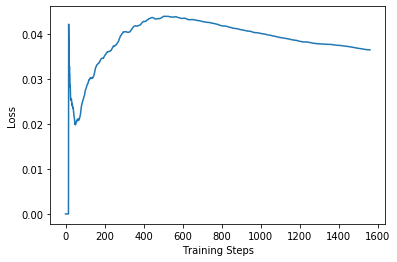

In [7]:
# evaluate training
plot_losses(losses, show=True)

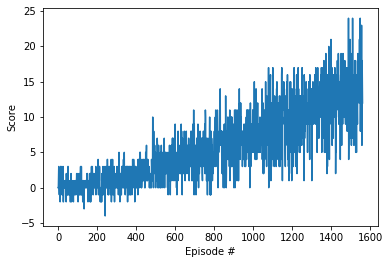

In [8]:
plot_scores(scores, show=True)

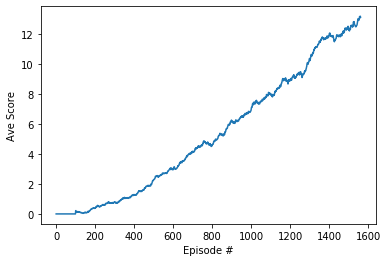

In [9]:
plot_scores(average_scores, plotName='Ave Score', show=True)

Avg. score: 13.13, with a high of: 21.0


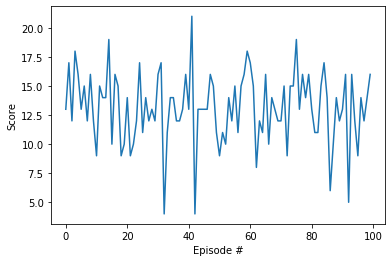

In [10]:
# test model
test_actor_env = (model, brain_name, env)
attemps = 100
filename = 'test_scores-{}.png'.format(attemps)

test_model(test_actor_env, attemps, filename, viewableSpeed=False)

In [11]:
env.close()